In [141]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
import os
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.visualization import hist
from deep_dss.helpers import *

# Run on GPU.
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [143]:
# Defaults
plt.rcParams.update({
'lines.color':'black',
'font.family':'serif',
'font.weight':'normal',
'text.color':'black',
'text.usetex': True,
'axes.edgecolor':'black',
'axes.linewidth':1.0,
'axes.titlesize':'x-large',
'axes.labelsize':'x-large',
'axes.labelcolor':'black',
'xtick.labelsize':'x-large',
'xtick.minor.width':1.0,
'xtick.major.width':1.0,
'ytick.major.size':7,
'ytick.minor.size':4,
'ytick.major.pad':8,
'ytick.minor.pad':8,
'ytick.labelsize':'x-large',
'ytick.minor.width':1.0,
'ytick.major.width':1.0,
'legend.numpoints':1,
'legend.fontsize':'x-large',
'legend.shadow':False,
'legend.frameon':False})

In [64]:
lognormal_map = load_map_by_val(0.85)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [65]:
gaussian_map = load_map_by_val(0.85, gaussian=True)

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered 

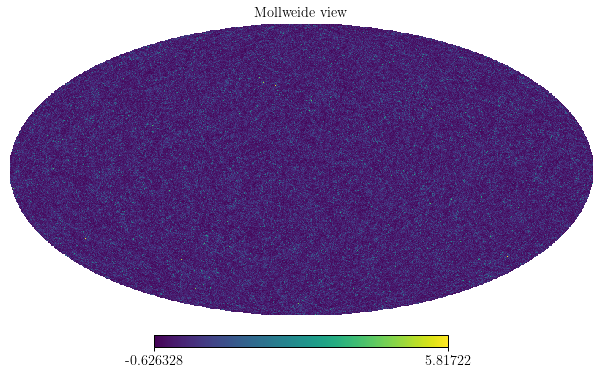

In [66]:
hp.mollview(lognormal_map, nest=True)

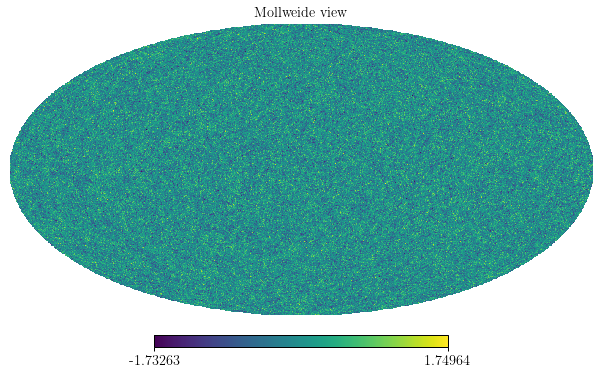

In [67]:
hp.mollview(gaussian_map, nest=True)

<ipython-input-72-b8ba3ac8ee3a>:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-72-b8ba3ac8ee3a>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


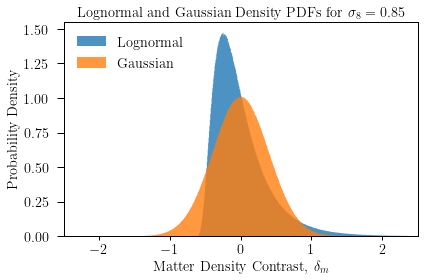

In [72]:
fig, ax = plt.subplots()
hist(lognormal_map, bins="scott", ax=ax, histtype="stepfilled", alpha=0.8, density=True, label="Lognormal")
hist(gaussian_map, bins="scott", ax=ax, histtype="stepfilled", alpha=0.8, density=True, label="Gaussian")
ax.set_xlim([-2.5, 2.5])
ax.set_xlabel("Matter Density Contrast, $\delta_m$")
ax.set_ylabel("Probability Density")
ax.set_title("Lognormal and Gaussian Density PDFs for $\sigma_8=0.85$")
ax.legend()
plt.tight_layout()
fig.show()
fig.savefig("../figures/map-f1z1-pdf-comparison-0.85.png")

In [73]:
def plot_pdfs(sigma8):
    lognormal_map = load_map_by_val(sigma8)
    gaussian_map = load_map_by_val(sigma8, gaussian=True)
    
    fig, ax = plt.subplots()
    hist(lognormal_map, bins="scott", ax=ax, histtype="stepfilled", alpha=0.8, density=True, label="Lognormal")
    hist(gaussian_map, bins="scott", ax=ax, histtype="stepfilled", alpha=0.8, density=True, label="Gaussian")
    ax.set_xlim([-2.5, 2.5])
    ax.set_xlabel("Matter Density Contrast, $\delta_m$")
    ax.set_ylabel("Probability Density")
    ax.set_title("Lognormal and Gaussian Density PDFs for $\sigma_8={0}$".format(sigma8))
    ax.legend()
    plt.tight_layout()
    fig.show()
    fig.savefig("../figures/map-f1z1-pdf-comparison-{0}.png".format(sigma8))

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))
<ipython-input-73-c102ac4e4b8f>:13: UserWarning: Creating leg

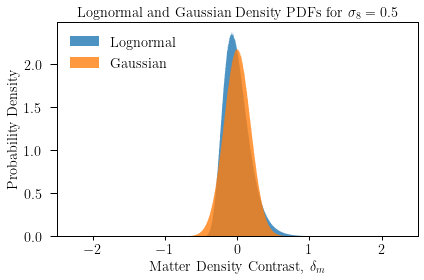

In [75]:
plot_pdfs(0.5)

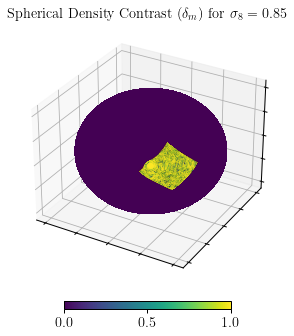

In [140]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Defaults
plt.rcParams.update({
'lines.color':'black',
'font.family':'serif',
'font.weight':'normal',
'text.color':'black',
'text.usetex': True,
'axes.edgecolor':'black',
'axes.linewidth':1.0,
'axes.titlesize':'x-large',
'axes.labelsize':'x-large',
'axes.labelcolor':'black',
'xtick.labelsize':'x-large',
'xtick.minor.width':1.0,
'xtick.major.width':1.0,
'ytick.major.size':7,
'ytick.minor.size':4,
'ytick.major.pad':8,
'ytick.minor.pad':8,
'ytick.labelsize':'x-large',
'ytick.minor.width':1.0,
'ytick.major.width':1.0,
'legend.numpoints':1,
'legend.fontsize':'x-large',
'legend.shadow':False,
'legend.frameon':False})


viridis = cm.get_cmap('viridis_r', 256)

old_nside=1024
new_nside=1024
radius = 100

dummy_map = load_map_by_val(0.85)
dummy_map = hp.ud_grade(dummy_map, new_nside, order_in="NEST", order_out="NEST")

dummy_map2 = convergence_map_by_val(0.85)
dummy_map2 = hp.ud_grade(dummy_map, new_nside, order_in="NEST", order_out="NEST")


plottable_map = np.zeros((hp.nside2npix(new_nside), 3))


for i in range(hp.nside2npix(new_nside)):
    x, y, z = hp.pix2vec(new_nside, i, nest=True)
    plottable_map[i] = np.array([radius*x, radius*y, radius*z])

k=12
# k2=9
dummy_map[:k*hp.nside2npix(new_nside)//48] = 1e1
dummy_map[(k+1)*hp.nside2npix(new_nside)//48:] = 1e1
# dummy_map2[:k2*hp.nside2npix(new_nside)//48] = 1e1
# dummy_map2[(k2+1)*hp.nside2npix(new_nside)//48:] = 1e1
        
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(plottable_map[:,0], plottable_map[:,1], plottable_map[:,2], c=viridis(dummy_map), s=20)
# ax.scatter(plottable_map[:,0], plottable_map[:,1], plottable_map[:,2], c=viridis(dummy_map2), s=20, alpha=0.5)

ax.set_title("Spherical Density Contrast ($\delta_m$) for $\sigma_8=0.85$")
fig.colorbar(scat, shrink=0.5, orientation="horizontal", pad=0.05)

ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.axes.zaxis.set_ticklabels([])

fig.savefig("../figures/spherical-0.85-high-res.png")

In [189]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_spherical_map(sigma8):
    # Defaults
    plt.rcParams.update({
    'lines.color':'black',
    'font.family':'serif',
    'font.weight':'normal',
    'text.color':'black',
    'text.usetex': True,
    'axes.edgecolor':'black',
    'axes.linewidth':1.0,
    'axes.titlesize':'x-large',
    'axes.labelsize':'x-large',
    'axes.labelcolor':'black',
    'xtick.labelsize':'x-large',
    'xtick.minor.width':1.0,
    'xtick.major.width':1.0,
    'ytick.major.size':7,
    'ytick.minor.size':4,
    'ytick.major.pad':8,
    'ytick.minor.pad':8,
    'ytick.labelsize':'x-large',
    'ytick.minor.width':1.0,
    'ytick.major.width':1.0,
    'legend.numpoints':1,
    'legend.fontsize':'x-large',
    'legend.shadow':False,
    'legend.frameon':False})


    viridis = cm.get_cmap('viridis_r', 256)

    old_nside=1024
    new_nside=1024
    radius = 100

    dummy_map = load_map_by_val(sigma8)
    dummy_map = hp.ud_grade(dummy_map, new_nside, order_in="NEST", order_out="NEST")

    dummy_map2 = convergence_map_by_val(sigma8)
    dummy_map2 = hp.ud_grade(dummy_map, new_nside, order_in="NEST", order_out="NEST")


    plottable_map = np.zeros((hp.nside2npix(new_nside), 3))


    for i in range(hp.nside2npix(new_nside)):
        x, y, z = hp.pix2vec(new_nside, i, nest=True)
        plottable_map[i] = np.array([radius*x, radius*y, radius*z])

    k=12
    # k2=9
    dummy_map[:k*hp.nside2npix(new_nside)//48] = 1e1
    dummy_map[(k+1)*hp.nside2npix(new_nside)//48:] = 1e1
    # dummy_map2[:k2*hp.nside2npix(new_nside)//48] = 0
    # dummy_map2[(k2+1)*hp.nside2npix(new_nside)//48:] = 1e1

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')

    scat = ax.scatter(plottable_map[:,0], plottable_map[:,1], plottable_map[:,2], c=viridis(dummy_map), s=20)
    # ax.scatter(plottable_map[:,0], plottable_map[:,1], plottable_map[:,2], c=viridis(dummy_map2), s=20, alpha=0.5)

    ax.set_title("Spherical Density Contrast ($\delta_m$) for $\sigma_8={0}$".format(sigma8))
    fig.colorbar(scat, shrink=0.5, orientation="horizontal", pad=0.05)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])

    fig.savefig("../figures/spherical-{0}-high-res.png".format(sigma8))

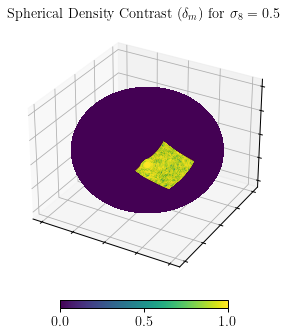

In [191]:
make_spherical_map(0.5)

In [89]:
plottable_map.shape

(786432, 4)

In [185]:
def plot_map_array(sigma8):
    
    
    # Defaults
    plt.rcParams.update({
    'lines.color':'black',
    'font.family':'serif',
    'font.weight':'normal',
    'text.color':'black',
    'text.usetex': True,
    'axes.edgecolor':'black',
    'axes.linewidth':1.0,
    'axes.titlesize':'x-large',
    'axes.labelsize':'x-large',
    'axes.labelcolor':'black',
    'xtick.labelsize':'x-large',
    'xtick.minor.width':1.0,
    'xtick.major.width':1.0,
    'ytick.major.size':7,
    'ytick.minor.size':4,
    'ytick.major.pad':8,
    'ytick.minor.pad':8,
    'ytick.labelsize':'x-large',
    'ytick.minor.width':1.0,
    'ytick.major.width':1.0,
    'legend.numpoints':1,
    'legend.fontsize':'x-large',
    'legend.shadow':False,
    'legend.frameon':False})
    
    plt.rcParams["axes.titlepad"] = 5.0
    
    noisy_lognormal_counts = count_map_by_val(sigma8)
    noisy_gaussian_counts = count_map_by_val(sigma8, gaussian=True)
    noiseless_lognormal_counts = count_map_by_val(sigma8, noiseless=True)
    noiseless_gaussian_counts = count_map_by_val(sigma8, gaussian=True, noiseless=True)
    
    noisy_lognormal_kappa = convergence_map_by_val(sigma8)
    noisy_gaussian_kappa = convergence_map_by_val(sigma8, gaussian=True)
    noiseless_lognormal_kappa = convergence_map_by_val(sigma8, noiseless=True)
    noiseless_gaussian_kappa = convergence_map_by_val(sigma8, gaussian=True, noiseless=True)
    
    noisy_lognormal_gamma = shear_maps_by_val(sigma8)
    noisy_gaussian_gamma = shear_maps_by_val(sigma8, gaussian=True)
    noiseless_lognormal_gamma = shear_maps_by_val(sigma8, noiseless=True)
    noiseless_gaussian_gamma = shear_maps_by_val(sigma8, gaussian=True, noiseless=True)
    
    fig, axs = plt.subplots(4, 4, figsize=(14,12), sharex='col', sharey='row',
                            gridspec_kw={'hspace': 0.1, 'wspace': 0.2})
    plt.axes(axs[0,0])
    hp.mollview(noisy_lognormal_counts, nest=True, hold=True, title="Noisy Lognormal \nCounts-in-Cells ($n_{gal}$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    plt.axes(axs[1,0])
    hp.mollview(noisy_lognormal_kappa, nest=True, hold=True, title="Noisy Lognormal \nConvergence ($\kappa$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[2,0])
    hp.mollview(noisy_lognormal_gamma[0], nest=True, hold=True, title="Noisy Lognormal Shear ($\gamma_1$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[3,0])
    hp.mollview(noisy_lognormal_gamma[1], nest=True, hold=True, title="Noisy Lognormal Shear ($\gamma_2$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[0,1])
    hp.mollview(noisy_gaussian_counts, nest=True, hold=True, title="Noisy Gaussian \nCounts-in-Cells ($n_{gal}$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[1,1])
    hp.mollview(noisy_gaussian_kappa, nest=True, hold=True, title="Noisy Gaussian \nConvergence ($\kappa$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[2,1])
    hp.mollview(noisy_gaussian_gamma[0], nest=True, hold=True, title="Noisy Gaussian Shear ($\gamma_1$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[3,1])
    hp.mollview(noisy_gaussian_gamma[1], nest=True, hold=True, title="Noisy Gaussian Shear ($\gamma_2$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[0,2])
    hp.mollview(noiseless_lognormal_counts, nest=True, hold=True, title="Noiseless Lognormal \nCounts-in-Cells ($n_{gal}$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[1,2])
    hp.mollview(noiseless_lognormal_kappa, nest=True, hold=True, title="Noiseless Lognormal \nConvergence ($\kappa$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[2,2])
    hp.mollview(noiseless_lognormal_gamma[0], nest=True, hold=True, title="Noiseless Lognormal Shear ($\gamma_1$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[3,2])
    hp.mollview(noiseless_lognormal_gamma[1], nest=True, hold=True, title="Noiseless Lognormal Shear ($\gamma_2$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[0,3])
    hp.mollview(noiseless_gaussian_counts, nest=True, hold=True, title="Noiseless Gaussian \nCounts-in-Cells ($n_{gal}$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[1,3])
    hp.mollview(noiseless_gaussian_kappa, nest=True, hold=True, title="Noiseless Gaussian \nConvergence ($\kappa$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[2,3])
    hp.mollview(noiseless_gaussian_gamma[0], nest=True, hold=True, title="Noiseless Gaussian Shear ($\gamma_1$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()
    plt.axes(axs[3,3])
    hp.mollview(noiseless_gaussian_gamma[1], nest=True, hold=True, title="Noiseless Gaussian Shear ($\gamma_2$)",
                coord=['G', 'E'], margins=(0,0,0,1), notext=True, xsize=2000)
    hp.graticule()    

    fig.suptitle("Full-Sky Mocks for $\sigma_8={0}$, $b=1.54$".format(sigma8), fontsize=20, y=0.92)
    fig.savefig("../figures/full-map-array-{}.png".format(sigma8),bbox_inches='tight')

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered 

/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/adiraju/opt/anaconda3/envs/deep_dss/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered 

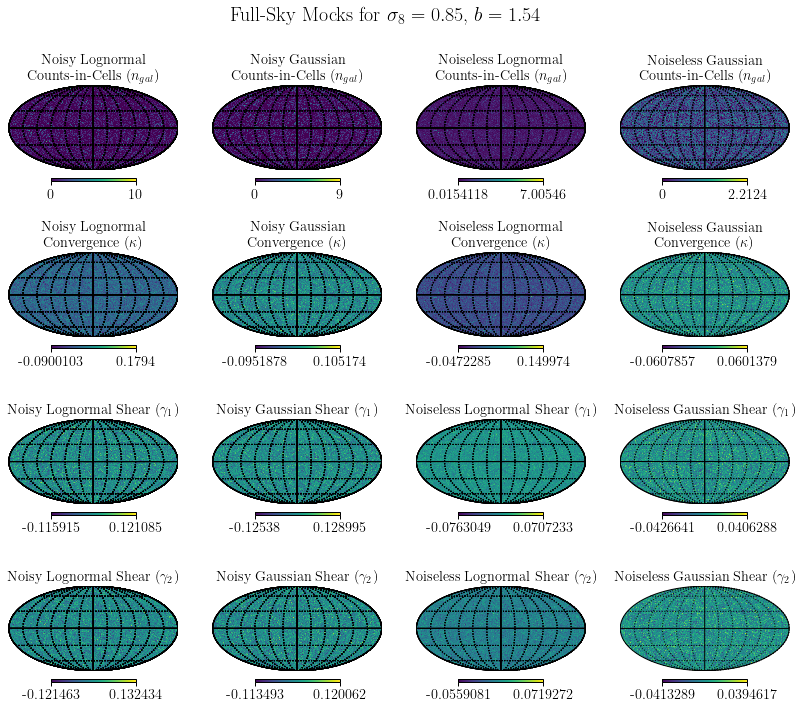

In [186]:
plot_map_array(0.85)